Valores faltantes en el dataset: 0
Características categóricas detectadas: ['tipo_Apartamento', 'tipo_Casa', 'tipo_Chalet adosado', 'color_Amarelo', 'color_Azul', 'color_Branco', 'color_Negro', 'color_Verde', 'color_Vermello', 'tipo_Apartamento.1', 'tipo_Casa.1', 'tipo_Chalet adosado.1', 'color_Amarelo.1', 'color_Azul.1', 'color_Branco.1', 'color_Negro.1', 'color_Verde.1', 'color_Vermello.1']
Forma del dataset: (20000, 47)
Features incluidas: ['superficie_interior_m2', 'superficie_exterior_m2', 'numero_habitacions', 'numero_banos', 'ano_construccion', 'lonxitude', 'latitude', 'temperatura_media_mes_construccion', 'distancia_centro_km', 'distancia_escola_km', 'indice_criminalidade', 'numero_arboles_xardin', 'edad_vivienda', 'superficie_por_habitacion', 'superficie_total', 'ratio_interior_exterior', 'densidad_banos', 'densidad_habitaciones', 'dist_coruna', 'dist_vigo', 'dist_santiago', 'calidad_edad', 'banos_por_habitacion', 'orientacion_valor', 'eficiencia_valor', 'calidade_valor', 'tra

/mnt/netapp2/Store_uni/home/usc/ci/avs/personal/aprendizaje/p4/venvP4/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/mnt/netapp2/Store_uni/home/usc/ci/avs/personal/aprendizaje/p4/venvP4/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/mnt/netapp2/Store_uni/home/usc/ci/avs/personal/aprendizaje/p4/venvP4/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/mnt/netapp2/Store_uni/home/usc/ci/avs/personal/aprendizaje/p4/venvP4/lib/python3.7/site-packages/sklearn/neural_network/_mu

Mejores hiperparámetros: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'max_iter': 500}


/mnt/netapp2/Store_uni/home/usc/ci/avs/personal/aprendizaje/p4/venvP4/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Métricas del modelo MLP:
  MAE: 33133.62
  RMSE: 49135.56
  R2: 0.9120

Curva de pérdida guardada - Ver 'results_mlp/mlp_loss_curve.png'
Análisis de errores guardado - Ver 'results_mlp/mlp_error_analysis.png'

Modelo guardado como 'models/mlp_model.pkl'
Tiempo total de ejecución: 339.14 segundos


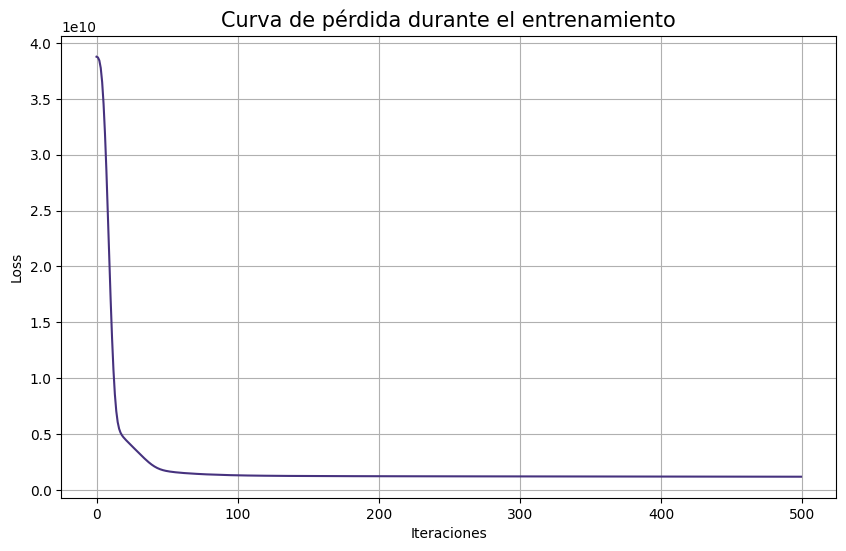

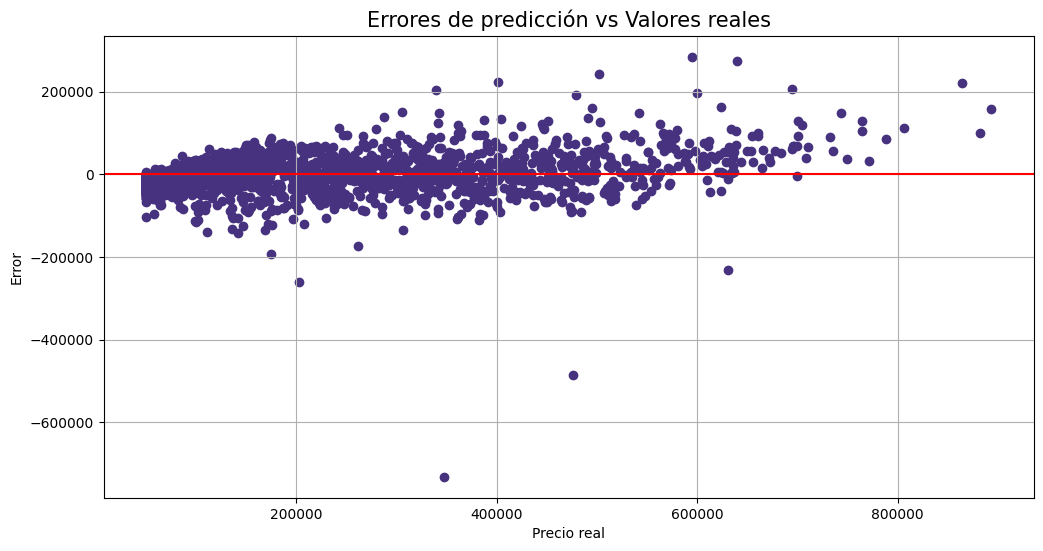

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import joblib
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Create directory for results
os.makedirs('models', exist_ok=True)
os.makedirs('results_mlp', exist_ok=True)

# Set visualization parameters
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette("viridis")

# Function to load and prepare data
def load_data(file_path):
    df = pd.read_csv(file_path)
    print(f"Valores faltantes en el dataset: {df.isnull().sum().sum()}")
    
    # Identify categorical features
    categorical_features = []
    for col in df.columns:
        if df[col].dtype == 'object' or col in ['tipo_edificacion', 'calidade_materiais', 
                                               'cor_favorita_propietario', 'acceso_transporte_publico',
                                               'orientacion', 'eficiencia_enerxetica'] or 'tipo_' in col or 'color_' in col:
            categorical_features.append(col)
    
    print(f"Características categóricas detectadas: {categorical_features}")
    
    # Separate features and target
    X = df.drop(['prezo_euros', 'id'], axis=1, errors='ignore')
    y = df['prezo_euros']
    
    print(f"Forma del dataset: {df.shape}")
    print(f"Features incluidas: {X.columns.tolist()}")
    
    return X, y, categorical_features

# Function to train MLP model
def train_mlp_model(X, y, random_state=42):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1, random_state=random_state
    )
    
    print("\n=== Entrenando modelo MLP (Red Neuronal) ===")
    
    # Standardize data for neural network
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Save scaler for later use
    joblib.dump(scaler, 'models/mlp_scaler.pkl')
    print("Scaler guardado como 'models/mlp_scaler.pkl'")
    
    # Initial hyperparameters
    param_grid = {
        'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive'],
        'max_iter': [500]
    }
    
    # Simplified grid for faster execution
    simple_param_grid = {
        'hidden_layer_sizes': [(100,), (100, 50)],
        'activation': ['relu', 'tanh'],
        'alpha': [0.0001, 0.001],
        'max_iter': [500]
    }
    
    # Create model
    model = MLPRegressor(random_state=random_state)
    
    # Grid search with cross-validation
    print("Realizando búsqueda de hiperparámetros con GridSearchCV...")
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=simple_param_grid,
        cv=5,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        verbose=1
    )
    
    # Fit grid search
    grid_search.fit(X_train_scaled, y_train)
    
    # Best parameters
    print(f"Mejores hiperparámetros: {grid_search.best_params_}")
    
    # Train final model
    best_model = MLPRegressor(**grid_search.best_params_, random_state=random_state)
    best_model.fit(X_train_scaled, y_train)
    
    # Evaluate model
    y_pred = best_model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(f"Métricas del modelo MLP:")
    print(f"  MAE: {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R2: {r2:.4f}")
    
    # Create a combined model object with the scaler and MLP model
    mlp_model = {
        'scaler': scaler,
        'model': best_model
    }
    
    # Plot loss curve
    plt.figure(figsize=(10, 6))
    plt.plot(best_model.loss_curve_)
    plt.title('Curva de pérdida durante el entrenamiento', fontsize=15)
    plt.xlabel('Iteraciones')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.savefig('results_mlp/mlp_loss_curve.png')
    print("\nCurva de pérdida guardada - Ver 'results_mlp/mlp_loss_curve.png'")
    
    # Analyze prediction errors
    errors = y_test - y_pred
    plt.figure(figsize=(12, 6))
    plt.scatter(y_test, errors)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.title('Errores de predicción vs Valores reales', fontsize=15)
    plt.xlabel('Precio real')
    plt.ylabel('Error')
    plt.grid(True)
    plt.savefig('results_mlp/mlp_error_analysis.png')
    print("Análisis de errores guardado - Ver 'results_mlp/mlp_error_analysis.png'")
    
    return mlp_model

# Main execution
if __name__ == "__main__":
    start_time = time.time()
    
    # Load data
    X, y, cat_features = load_data('train_processed.csv')
    
    # Train MLP model
    model = train_mlp_model(X, y)
    
    # Save model
    joblib.dump(model, 'models_stacking/stacking_mlp_model.pkl')
    print("\nModelo guardado como 'models/mlp_model.pkl'")
    
    end_time = time.time()
    print(f"Tiempo total de ejecución: {end_time - start_time:.2f} segundos")